In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
##Redundant Features
cols = ['id', 'encounter_id', 'patient_nbr','payer_code', 'admission_type_id','discharge_disposition_id','admission_source_id']
data[cols]

,id,encounter_id,patient_nbr,payer_code,admission_type_id,discharge_disposition_id,admission_source_id
0,1,2278392,8222157,?,6,25,1
1,2,149190,55629189,?,1,1,7
2,3,64410,86047875,?,1,1,7
3,4,500364,82442376,?,1,1,7
4,5,16680,42519267,?,1,1,7
...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,MC,1,3,7
101762,101763,443847782,74694222,MC,1,4,5
101763,101764,443854148,41088789,MC,1,1,7
101764,101765,443857166,31693671,MC,2,3,7


In [4]:
data.describe(include=["object", "bool"])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [5]:
data = data.replace("?", np.nan)

In [6]:
diag_1 = data.diag_1.mode()[0]
diag_2 = data.diag_2.mode()[0]
diag_3 = data.diag_3.mode()[0]

In [7]:
data['diag_1'] = data['diag_1'].apply(lambda x : diag_1 if x == np.nan else x)
data['diag_2'] = data['diag_1'].apply(lambda x : diag_2 if x == np.nan else x)
data['diag_3'] = data['diag_3'].apply(lambda x : diag_3 if x == np.nan else x)


In [8]:
data.diag_1 = data.diag_1.fillna(diag_1)
data.diag_2 = data.diag_2.fillna(diag_2)
data.diag_3 = data.diag_3.fillna(diag_3)

In [9]:
ageDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25,
'[30-40)' : 35,
'[40-50)' : 45,
'[50-60)' : 55,
'[60-70)' : 65,
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : ageDict[x])

In [10]:
data['diag_1'] = data['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_2'] = data['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_3'] = data['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [11]:
data['readmitted'] = data['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

In [12]:
data['health_index'] = data.apply(lambda x:  1 / (x['number_emergency'] + x['number_inpatient'] + x['number_outpatient'])
                                  if x['number_emergency'] != 0 or x['number_inpatient'] != 0 or x['number_outpatient'] != 0
                                  else 1, axis = 1)



total = data['time_in_hospital'].sum() + data['num_procedures'].sum() + data['num_medications'].sum()+\
                                data['num_lab_procedures'].sum() + data['number_diagnoses'].sum()

data['severity_of_disease'] = (data['time_in_hospital'] + data['num_procedures'] +
                              data['num_medications'] + data['num_lab_procedures'] +
                              data['number_diagnoses']) / total

drugList = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
            'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
            'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide.metformin','glipizide.metformin',
            'glimepiride.pioglitazone','metformin.rosiglitazone','metformin.pioglitazone']


number_of_changes = []
for i in range(len(data)):
    changeCount = 0
    for col in drugList :
        if data.iloc[i][col] in ['Down', 'Up'] :
            changeCount += 1
    number_of_changes.append(changeCount)

data['number_of_changes'] = number_of_changes

In [13]:
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' else ( 300 if x == '>300' else ( 100 if x == 'Norm' else  0)))

In [14]:
data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' else (8 if  x == '>8' else ( 5 if x == 'Norm' else  0)))

In [15]:
for col in drugList:
    data[col] = data[col].apply(lambda x : 10 if x == 'Up' else ( -10 if x == 'Down' else ( 0 if x == 'Steady' else  -20)))


data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch' else -1)

In [16]:
## Engineered Features from domain knowledge
data['total_procedures'] = data['num_procedures'] + data['num_lab_procedures']
data['total_medical_interactions'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
data['medication_ratio'] = data['num_medications'] / data['time_in_hospital']
data['avg_procedures_per_visit'] = data['total_procedures'] / (data['number_outpatient'] + data['number_inpatient'])
data['diagnoses_per_procedure'] = data['number_diagnoses'] / data['total_procedures']

data["time_in_hospital_per_procedure"] = data["time_in_hospital"] / data["num_procedures"]
data["number_medications_per_diagnosis"] = data["num_medications"] / data["number_diagnoses"]
data["average_lab_procedure_cost"] = data["num_lab_procedures"].mean()
data["emergency_room_visit_rate"] = data["number_emergency"] / data.shape[0]
data["inpatient_admission_rate"] = data["number_inpatient"] / data.shape[0]

In [17]:
data = data.replace([np.inf, -np.inf], 0)

In [18]:
non_numeric_columns = data.select_dtypes(exclude=[float, int])
data["weight"]  = ["UNK" if str(i) == str(np.nan) else i for i in data["weight"] ]
data.weight.value_counts()

weight
UNK          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [19]:
weightDict = {'[50-75)' : '62',
'[75-100)' : '87',
'[100-125)' : '112',
'[125-150)' : '137',
'[25-50)' : '37',
'[0-25)' : '12',
'[150-175)' : '162',
'[175-200)' : '187',
'>200' : '200',
'UNK' : f"{np.nan}"}

data['weight'] = data['weight'].apply(lambda x : weightDict[x])

In [20]:
data.weight = data.weight.astype(float)

In [21]:
data_checkout = data.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
from tqdm import tqdm

In [25]:
data.isna().sum()['weight']

98569

In [26]:
mean_weight = round(data.weight.mean())
data.weight = data.weight.fillna(mean_weight)

In [27]:
data = data.replace([np.inf, -np.inf], 0)

In [28]:
data.to_csv("cleandat4modelling.csv", index = False)

In [29]:
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
from tqdm import tqdm
import pandas as pd
from tabulate import tabulate

def BasedLine(df, method, models, n_splits=10):
    start_time = time.time()  # Record the start time

    df_check = df.copy()

    y = df_check['readmitted']
    X = df_check.drop(columns='readmitted')

    #X = X.fillna(0)
    X = X.fillna(X.mean())

    stratified_kfold = StratifiedKFold(n_splits=n_splits, random_state=2023, shuffle=True)

    scoring = 'accuracy'
    results, results_weigh = [], []
    names = []
    scores, scores_weigh = [], []
    auc_scores = []  # Store AUC scores
    data = []
    for name, model in models:
        model_scores = []
        model_scores_weigh = []
        model_auc_scores = []  # Store AUC scores for each fold

        with tqdm(total=n_splits, desc=f"Running {name}") as pbar:
            for train_idx, test_idx in stratified_kfold.split(X, y):
                X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

                model.fit(X_train, y_train)
                score_non = f1_score(model.predict(X_valid), y_valid)
                score_weigh = f1_score(model.predict(X_valid), y_valid, average='weighted')
                model_scores.append(score_non)
                model_scores_weigh.append(score_weigh)

                # Calculate AUC score
                proba = model.predict_proba(X_valid)[:, 1]
                auc = roc_auc_score(y_valid, proba)
                model_auc_scores.append(auc)

                pbar.update(1)

        names.append(name)
        scores_weigh.append(model_scores_weigh)
        auc_scores.append(model_auc_scores)  # Store AUC scores for the model

        # Calculate mean AUC score across folds
        mean_auc = np.mean(model_auc_scores)

        data.append([name, np.mean(model_scores), np.mean(model_scores_weigh), mean_auc])

    headers = ["Model", "F1 Score", "F1 Score Weighted", "AUC Score"]
    print(tabulate(data, headers=headers, tablefmt='orgtbl'))

    end_time = time.time()  # Record the end time
    execution_time = end_time - start_time
    print("Execution time: {:.2f} seconds".format(execution_time))

    df_results = pd.DataFrame(data, columns=headers)
    return df_results


In [30]:
def BasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    basedModels.append(('XG'   , XGBClassifier()))
    basedModels.append(('LG'   , LGBMClassifier()))
    basedModels.append(('CAT'   , CatBoostClassifier(silent=True)))
    return basedModels

In [31]:
models = BasedModel()

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
#result
result = BasedLine(df = data, method = False , models = models, n_splits=10)

Running LG:   0%|                                                                               | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2745
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111596 -> initscore=-2.074538
[LightGBM] [Info] Start training from score -2.074538


Running LG:  10%|███████                                                                | 1/10 [00:02<00:22,  2.50s/it]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2741
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111596 -> initscore=-2.074538
[LightGBM] [Info] Start training from score -2.074538


Running LG:  20%|██████████████▏                                                        | 2/10 [00:04<00:18,  2.28s/it]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2736
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111596 -> initscore=-2.074538
[LightGBM] [Info] Start training from score -2.074538


Running LG:  30%|█████████████████████▎                                                 | 3/10 [00:06<00:15,  2.17s/it]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111596 -> initscore=-2.074538
[LightGBM] [Info] Start training from score -2.074538


Running LG:  40%|████████████████████████████▍                                          | 4/10 [00:08<00:12,  2.14s/it]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2736
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111596 -> initscore=-2.074538
[LightGBM] [Info] Start training from score -2.074538


Running LG:  50%|███████████████████████████████████▌                                   | 5/10 [00:10<00:10,  2.12s/it]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2731
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111596 -> initscore=-2.074538
[LightGBM] [Info] Start training from score -2.074538


Running LG:  60%|██████████████████████████████████████████▌                            | 6/10 [00:12<00:08,  2.09s/it]

[LightGBM] [Info] Number of positive: 10222, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2741
[LightGBM] [Info] Number of data points in the train set: 91590, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111606 -> initscore=-2.074440
[LightGBM] [Info] Start training from score -2.074440


Running LG:  70%|█████████████████████████████████████████████████▋                     | 7/10 [00:15<00:06,  2.11s/it]

[LightGBM] [Info] Number of positive: 10222, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2742
[LightGBM] [Info] Number of data points in the train set: 91590, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111606 -> initscore=-2.074440
[LightGBM] [Info] Start training from score -2.074440


Running LG:  80%|████████████████████████████████████████████████████████▊              | 8/10 [00:17<00:04,  2.08s/it]

[LightGBM] [Info] Number of positive: 10222, number of negative: 81368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2745
[LightGBM] [Info] Number of data points in the train set: 91590, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111606 -> initscore=-2.074440
[LightGBM] [Info] Start training from score -2.074440


Running LG:  90%|███████████████████████████████████████████████████████████████▉       | 9/10 [00:19<00:02,  2.07s/it]

[LightGBM] [Info] Number of positive: 10221, number of negative: 81369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2747
[LightGBM] [Info] Number of data points in the train set: 91590, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111595 -> initscore=-2.074550
[LightGBM] [Info] Start training from score -2.074550


Running CAT: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [09:52<00:00, 59.28s/it]

| Model   |   F1 Score |   F1 Score Weighted |   AUC Score |
|---------+------------+---------------------+-------------|
| LR      |  0         |            0.940903 |    0.503354 |
| RF      |  0.0223639 |            0.938567 |    0.640036 |
| GBM     |  0.0197065 |            0.939105 |    0.674276 |
| ET      |  0.0222025 |            0.93854  |    0.634758 |
| XG      |  0.0625081 |            0.933193 |    0.666421 |
| LG      |  0.0354969 |            0.938014 |    0.680229 |
| CAT     |  0.0528378 |            0.936152 |    0.680512 |
Execution time: 19917.40 seconds


In [37]:
result

,Model,F1 Score,F1 Score Weighted,AUC Score
0,LR,0.000000,0.940903,0.503354
1,RF,0.022364,0.938567,0.640036
2,GBM,0.019706,0.939105,0.674276
3,ET,0.022203,0.938540,0.634758
4,XG,0.062508,0.933193,0.666421
5,LG,0.035497,0.938014,0.680229
6,CAT,0.052838,0.936152,0.680512


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

def plot_bar_and_histogram(dataframe):
    plt.figure(figsize=(15, 5))

    # Define a color palette with the number of unique models in the DataFrame
    num_models = len(dataframe['Model'])
    colors = sns.color_palette('husl', n_colors=num_models)

    # Bar plot for F1 Score
    ax1 = plt.subplot(1, 3, 1)
    bars = plt.bar(dataframe['Model'], dataframe['F1 Score'], color=colors)
    plt.xlabel('Model')
    plt.ylabel('F1 Score')
    plt.title('Plot of F1 Score')

    # Add text annotations to the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

    # Bar plot for F1 Score Weighted
    plt.subplot(1, 3, 2)
    barss = plt.bar(dataframe['Model'], dataframe['F1 Score Weighted'], color=colors)
    plt.xlabel('Model')
    plt.ylabel('F1 Score Weighted')
    plt.title('Plot of F1 Score Weighted')

    # Add text annotations to the bars
    for bar in barss:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
        
    # Bar plot for AUC Score
    plt.subplot(1, 3, 3)
    barss = plt.bar(dataframe['Model'], dataframe['AUC Score'], color=colors)
    plt.xlabel('Model')
    plt.ylabel('AUC Score')
    plt.title('Plot of AUC Score')

    # Add text annotations to the bars
    for bar in barss:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


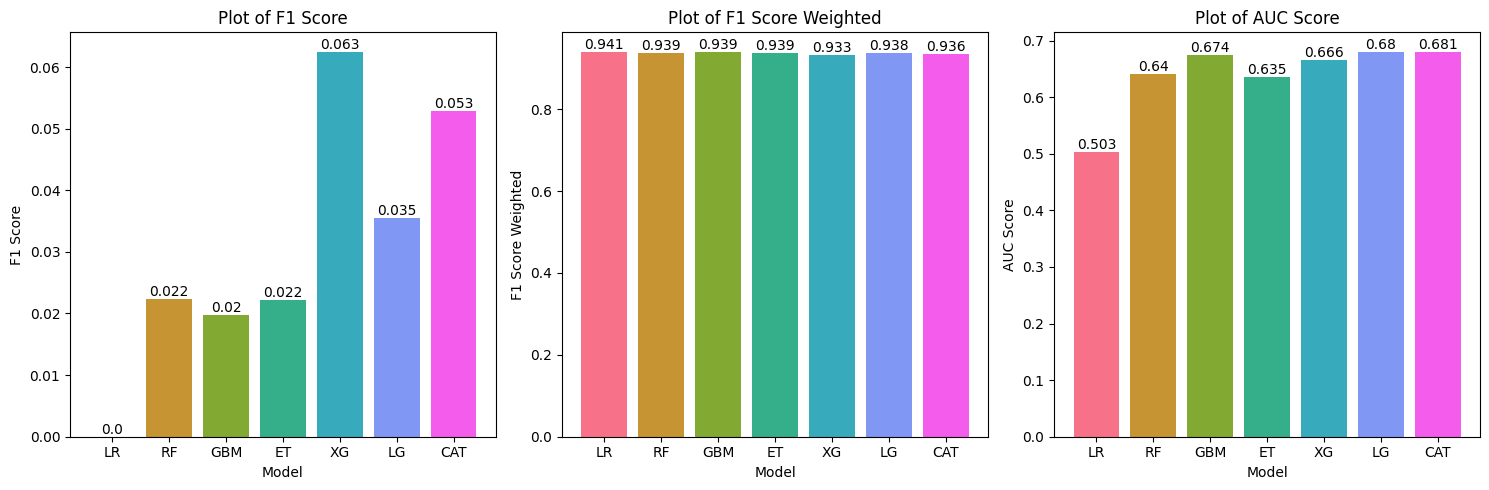

In [36]:
plot_bar_and_histogram(dataframe = result)